In [78]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles


from numpy import sin, cos
from scipy import linalg
import autograd
from tqdm.notebook import tqdm

In [4]:
t = np.linspace(0, 2 * np.pi, 1000)
x, y=( 0.12 * cos(5*t) + 1)  * cos(t),  (0.12 * cos(5*t) +1) * sin(t)

In [152]:

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

reds = y == 0

blues = y == 1


In [173]:
class myKernelPCA(KernelPCA):
    def __init__(self, n_components=None, kernel="linear",
                 gamma=None, degree=3, coef0=1, kernel_params=None,
                 alpha=1.0, fit_inverse_transform=False, eigen_solver='auto',
                 tol=0, max_iter=None, remove_zero_eig=False,
                 random_state=None, copy_X=True, n_jobs=None, k=1):
        self.k = k
        super(myKernelPCA, self).__init__(n_components=None,  kernel="linear",
                 gamma=None, degree=3, coef0=1, kernel_params=None,
                 alpha=1.0, fit_inverse_transform=False, eigen_solver='auto',
                 tol=0, max_iter=None, remove_zero_eig=False,
                 random_state=None, copy_X=True, n_jobs=None)

    
    def inverse_transform(self, X):
        λ_non_zeros = np.flatnonzero(self.lambdas_)
        α = np.zeros_like(self.alphas_)
        α[:, λ_non_zeros] = (self.alphas_[:, λ_non_zeros]
                                       / np.sqrt(self.lambdas_[λ_non_zeros]))
        
        
        KX_ = self._get_kernel(X, self.X_fit_)
 
        KX_ = self._centerer.transform(KX_)
    
        β = KX_.dot(α)
        
        γ = β.dot(α.T)
        
        epochs = 6000
        i = 0
        Z = np.random.randn(*X.shape)
        denoms = []
        trk = []
        for i in tqdm(range(epochs)):
            
            KZ_ = self._get_kernel(Z, self.X_fit_)
 
            KZ_center  = KZ_.mean(axis=1)
#             KZ_ = KZ_ - KZ_center[...,None]
            denom =  np.zeros(Z.shape[0])
            num = np.zeros(Z.shape)
            for j in range(len(Z)):
                denom[j] = (KZ_[j,:] * γ[j,:]).sum() # + KZ_center * γ.sum(axis=1) * 0
                num[j, :] =  ( (KZ_[j,:] * γ[j,:])[..., None] * ( self.X_fit_ ) ).sum(axis=0)  #+ KZ_.dot( self.X_fit_ ) * γ.sum(axis=1)[...,None] *  0

#             denom = (KZ_ * γ).sum(axis=1) + KZ_center * γ.sum(axis=1) * 0
#             num = (KZ_* γ).dot( self.X_fit_ )   + KZ_.dot( self.X_fit_ ) * γ.sum(axis=1)[...,None] * 0
            
            Z_new = num / denom[..., None]
            
            trk.append(np.abs(Z_new - Z).max())
            denoms.append(np.abs(denom).min())
            
            Z = Z_new
        print(min(denoms))
        print((trk[-1], min(trk)))
        return Z
            

    

In [174]:
np.random.seed(0)

kpca2 = myKernelPCA(kernel="rbf", fit_inverse_transform=False)

kpca2.fit(X[blues,:])

myKernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
            fit_inverse_transform=False, gamma=None, k=1, kernel='linear',
            kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
            random_state=None, remove_zero_eig=False, tol=0)

In [175]:
X[blues,:].shape


(200, 2)

In [176]:
kpca2.lambdas_.shape

(90,)

(400, 93)



0.00012072703811583096
(0.395647995350771, 0.395647995350771)


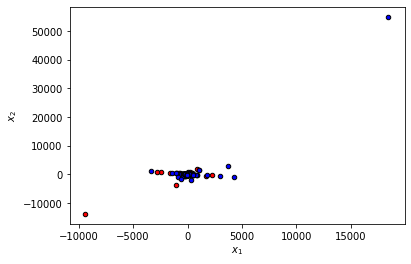

In [177]:

for d in range(2):
    kpca2 = myKernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=False)
    kpca2.fit(X[reds,:])
    
    
    X_kpca2 = kpca2.transform(X)
    Xk = np.copy(X_kpca2 )

    sel = list(range(Xk.shape[1]))
    sel.remove(d)

    X_kpca2[:,d+1:] = 0
    print(X_kpca2.shape)
    
#     X_prime0 = kpca2.inverse_transform(X_kpca2)
    X_prime = kpca2.inverse_transform(X)
#     X_prime2 = X -  X_prime0
#     print(primo.shape)

    plt.scatter(X_prime[reds, 0], X_prime[reds, 1], c="red",
                s=20, edgecolor='k')
    plt.scatter(X_prime[blues, 0], X_prime[blues, 1], c="blue",
                s=20, edgecolor='k')
#     print(nul.shape)
#     print(nul[i,:].shape)
#     for i in range(X_prime.shape[0]):
#         plt.plot([nul[i,0], rng[i,0]], [nul[i,1], rng[i,1]],"-y", linewidth=0.5, alpha=1)
    
#     plt.scatter(nul[reds, 0], nul[reds, 1], c="purple",
#                 s=20, edgecolor='k')
#     plt.scatter(nul[blues, 0], nul[blues, 1], c="cyan",
#                 s=20, edgecolor='k')
    
    
#     plt.scatter(rng[reds, 0], rng[reds, 1], c="purple",
#                 s=20, edgecolor='k')
#     plt.scatter(rng[blues, 0], rng[blues, 1], c="cyan",
#                 s=20, edgecolor='k')
    
#     plt.scatter(X[reds, 0], X[reds, 1], c="purple",
#                 s=20, edgecolor='k')
#     plt.scatter(X[blues, 0], X[blues, 1], c="cyan",
#                 s=20, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()
    break
#     break


In [137]:
X_kpca2

array([[ 0.65564692,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03586121,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25922064,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.17195595,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.01134965,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94215128,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
X_prime = X - X_back2

NameError: name 'X_back2' is not defined

In [45]:
X_prime.shape

(400, 2)

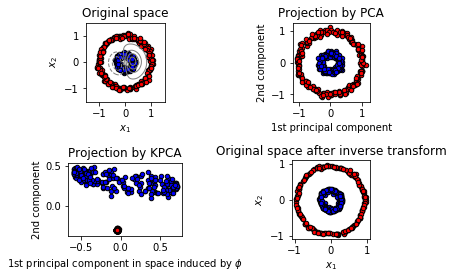

In [25]:
# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0

blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

Text(0, 0.5, '$x_2$')

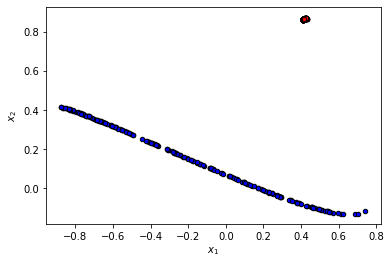

Text(0, 0.5, '$x_2$')

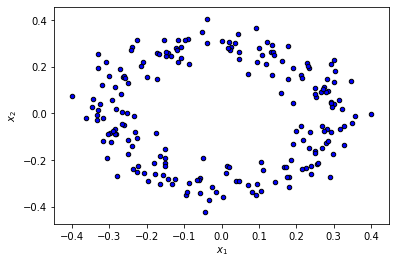

In [57]:
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")